In [1]:
from mdagent import MDAgent

In [2]:
#todays date and time
import datetime

start = datetime.datetime.now()
date = start.strftime("%Y-%m-%d")
print("date:",date)
time = start.strftime("%H:%M:%S")
print("time:",time)

date: 2024-09-30
time: 21:36:15


In [3]:
descriptive_prompt_4 = "Complete the following MD tasks: 1. Download the PDB file 1ZNI. 2. Pre-process the file by adding missing atoms, hydrogens and replacing non-standard residues. 3. Simulate for 1 ps at 300 K. 4. Calculate the RMSD of the simulation."
non_descriptive_prompt_4 = "Simulate protein 1ZNI at 300 K for 1 ps and calculate the RMSD."

In [4]:
llm_model = "gpt-4-turbo-2024-04-09"
tools = "all"

In [5]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)

##### descriptive prompt

In [6]:
start1 = datetime.datetime.now()
agent_1.run(descriptive_prompt_4)

Thought: The task involves multiple steps starting with downloading a PDB file, preprocessing it, running a simulation, and finally calculating the RMSD. I will begin by downloading the PDB file for 1ZNI.

Action:
```json
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "1ZNI"
  }
}
```PDB file found with this ID: 1ZNI
Now that the PDB file for 1ZNI has been successfully downloaded, the next step is to preprocess this file. This involves adding missing atoms, adding hydrogens, and replacing non-standard residues. I will use the CleaningToolFunction to perform these tasks.

Action:
```json
{
  "action": "CleaningToolFunction",
  "action_input": {
    "pdb_id": "1ZNI_213621",
    "add_missing_atoms": true,
    "add_hydrogens": true,
    "replace_nonstandard_residues": true,
    "remove_heterogens": false,
    "remove_water": false,
    "add_hydrogens_ph": 7.0
  }
}
```file path: /Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_432/pdb/1ZNI_raw_20240930_213621.pdb
The PDB 

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [7]:
end = datetime.datetime.now()
elapsed = end - start1
print(f"agent_1 duration: {elapsed.total_seconds()/60:.2f} minutes")

agent_1 duration: 2.94 minutes


In [8]:
agent_1.path_registry.list_path_names()

'Names found in registry: 1ZNI_213621, 1ZNI_213630'

In [9]:
registry = agent_1.path_registry
all_names = registry.list_path_names()
print(all_names)

Names found in registry: 1ZNI_213621, 1ZNI_213630


In [10]:
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1ZNI_213621: PDB file downloaded from RSCB
 PDBFile ID: 1ZNI_213621
 1ZNI_213630: Cleaned File:  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 


In [11]:
# let's see if we can't grab the plot
import re
import os
match = re.search(rf"fig0_\d+", all_names)
plot_path = registry.get_mapped_path(match.group(0))
assert os.path.exists(plot_path)

AttributeError: 'NoneType' object has no attribute 'group'

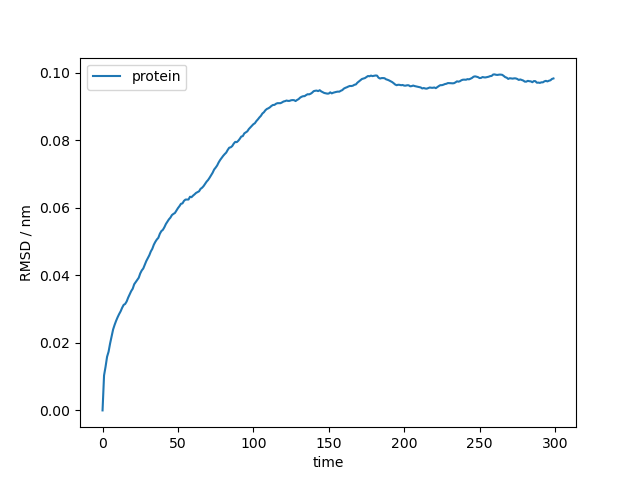

In [12]:
from IPython.display import Image
Image(filename=plot_path)

##### non-descriptive prompt

In [13]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
start2 = datetime.datetime.now()
agent_2.run(non_descriptive_prompt_4)

Thought: To simulate the protein 1ZNI at 300 K for 1 ps and calculate the RMSD, I need to first set up and run the simulation using the appropriate molecular dynamics tool. After the simulation, I can then compute the RMSD using the RMSD computation tool.

Action:
```json
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1ZNI",
        "forcefield_files": ["amber99sb.xml"],
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1.0 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "constraintTolerance": 0.00001,
            "solvate": true
        },
        "integrator_params": {
            "integrator_type": "LangevinMiddle",
            "Temperature": "300 * kelvin",
            "Friction": "1.0 / picoseconds",
            "Timestep": "0.002 * picoseconds"
        },
        "simulation_params": {
            "Ensemble": "NVT",
            "Number of Steps": 500,
  

System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x31585c2a0> >
Setting up integrator...
Creating simulation...
simulation set!
Performing energy minimization...
Minimization complete!
Initial Positions saved to initial_positions.pdb
Equilibrating...
Simulating...
Done!
Standalone simulation script written to /Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_365/simulations/NVT_1ZNI_131429_20240918_131441.py
['TRAJ_sim0_130800_1XQ8_130745_20240918_130944.dcd', 'LOG_sim0_131441_1ZNI_131429_20240918_131527.txt', 'prompt8.ipynb', 'TRAJ_sim0_131441_1ZNI_131429_20240918_131527.dcd', 'LOG_sim0_130800_1XQ8_130745_20240918_130944.txt', 'prompt2.ipynb', 'prompt6.ipynb', 'TOP_sim0_130800_1XQ8_130745_20240918_130944.pdb', 'prompt4.ipynb', 'prompt3.ipynb', 'prompt1.ipynb', 'prompt5.ipynb', 'TOP_sim0_131441_1ZNI_131429_20240918_131527.pdb', 'prompt7.ipynb']
The molecular dynamics simulation of protein 1ZNI at 300 K for 1 ps has been successfully compl

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [14]:
end = datetime.datetime.now()
elapsed = end - start2
print(f"agent_2 duration: {elapsed.total_seconds()/60:.2f} minutes")

agent_2 duration: 37.19 minutes


In [15]:
registry = agent_2.path_registry
all_names = registry.list_path_names()
print(all_names)

Names found in registry: 1ZNI_131413, 1ZNI_131429, top_sim0_131441, sim0_131441, rec0_131527, rec1_131527, rec2_131527


In [16]:
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1ZNI_131413: PDB file downloaded from RSCB
 PDBFile ID: 1ZNI_131413
 1ZNI_131429: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_131441: Initial positions for simulation sim0_131441
 sim0_131441: Basic Simulation of Protein 1ZNI_131429
 rec0_131527: Simulation trajectory for protein 1ZNI_131429 and simulation sim0_131441
 rec1_131527: Simulation state log for protein 1ZNI_131429 and simulation sim0_131441
 rec2_131527: Simulation pdb frames for protein 1ZNI_131429 and simulation sim0_131441


In [17]:
# let's see if we can't grab the plot
import re
import os
match = re.search(rf"fig0_\d+", all_names)
plot_path = registry.get_mapped_path(match.group(0))
assert os.path.exists(plot_path)

AttributeError: 'NoneType' object has no attribute 'group'

In [ ]:
from IPython.display import Image
Image(filename=plot_path)